# Sentiment Analysis on Amazon Product Reviews

## 1. Dataset Overview
- **Dataset Description**:
  - Analyze an Amazon product review dataset containing textual reviews (`reviewText`) and corresponding sentiment labels (`Positive`).
  - Sentiment is binary: 1 for positive, 0 for negative.
- **Objective**:
  - Predict the sentiment of a product review based on its textual content.


In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'
df = pd.read_csv(url)
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


## 2. Data Preprocessing
- Handle missing values, if any.
- Perform text preprocessing on the `reviewText` column:
  - Convert text to lowercase.
  - Remove stop words, punctuation, and special characters.
  - Tokenize and lemmatize text data.
- Split the dataset into training and testing sets.


In [3]:
# Check if any missing values
df.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess_text(text):
    text = text.lower() 
    text = ''.join([char for char in text if char not in string.punctuation]) 
    tokens = word_tokenize(text) 
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] 
    return ' '.join(tokens)

df['cleanedText'] = df['reviewText'].apply(preprocess_text)

In [6]:
#Train-Test Split
X = df['cleanedText']
y = df['Positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## 3. Model Selection
- Choose at least three machine learning models for sentiment classification:
  - Statistical Models:
    - Logistic Regression
    - Random Forest
    - Support Vector Machine (SVM)
    - Naïve Bayes
    - Gradient Boosting (e.g., XGBoost, AdaBoost, CatBoost)
  - Neural Models:
    - LSTM (Long Short-Term Memory)
    - GRUs (Gated Recurrent Units)


In [8]:
# Initialize the Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC(random_state=42),
    "Naïve Bayes": MultinomialNB(),
}

## 4. Model Training
- Train each selected model on the training dataset.
- Utilize vectorization techniques for text data:
  - TF-IDF (Term Frequency-Inverse Document Frequency)
  - Word embeddings (e.g., Word2Vec, GloVe)


In [9]:
# Train the models
t_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    t_models[name] = model


Training Logistic Regression...

Training Random Forest...

Training SVM...

Training Naïve Bayes...


## 5. Formal Evaluation
- Evaluate the performance of each model on the testing set using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix


In [10]:
# Evaluate the Models
results = {}
for name, model in t_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test_tfidf) 
    accuracy = accuracy_score(y_test, y_pred) 
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": accuracy,
        "precision": report['1']['precision'],
        "recall": report['1']['recall'],
        "f1_score": report['1']['f1-score']
    }
    print(f"{name} - Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))


Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.88725
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       958
           1       0.90      0.96      0.93      3042

    accuracy                           0.89      4000
   macro avg       0.87      0.81      0.83      4000
weighted avg       0.88      0.89      0.88      4000


Evaluating Random Forest...
Random Forest - Accuracy: 0.8695
              precision    recall  f1-score   support

           0       0.82      0.58      0.68       958
           1       0.88      0.96      0.92      3042

    accuracy                           0.87      4000
   macro avg       0.85      0.77      0.80      4000
weighted avg       0.87      0.87      0.86      4000


Evaluating SVM...
SVM - Accuracy: 0.8825
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       958
           1       0.91      0.93      0.92      3042

   

## 6. Hyperparameter Tuning
- Perform hyperparameter tuning for selected models using:
  - Grid Search
  - Random Search
- Explain the chosen hyperparameters and justify their selection.


In [17]:
# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 0.5, 1.0, 5.0, 10.0],  
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2'],
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
    },
    "SVM": {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2'],  
        'loss': ['squared_hinge', 'hinge'],  
        'max_iter': [1000, 2000],  
    },
    "Naïve Bayes": {
        'alpha': [0.1, 0.5, 1.0, 2.0],
    }
}


In [18]:
# Initialize the RandomizedSearchCV result dictionary
random_search_results = {}

# Perform RandomizedSearchCV for each model
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    
    # Initialize RandomizedSearchCV with the appropriate parameter grid
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], 
                                       n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)
    
    # Fit the model
    random_search.fit(X_train_tfidf, y_train)
    
    # Store the best result for each model
    random_search_results[model_name] = random_search.best_params_

Performing RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing RandomizedSearchCV for SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing RandomizedSearchCV for Naïve Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [19]:
# Display the best hyperparameters for each model
print("\nBest Hyperparameters for Each Model:")
for model_name, best_params in random_search_results.items():
    print(f"{model_name}: {best_params}")


Best Hyperparameters for Each Model:
Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 5.0}
Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
SVM: {'penalty': 'l2', 'max_iter': 2000, 'loss': 'hinge', 'C': 1.0}
Naïve Bayes: {'alpha': 0.1}


## 7. Comparative Analysis
- Compare the performance of all models based on evaluation metrics.
- Identify strengths and weaknesses of each model (e.g., speed, accuracy, interpretability).


In [20]:
res = pd.DataFrame(results).T
print(res)

                     accuracy  precision    recall  f1_score
Logistic Regression   0.88725   0.896784  0.962525  0.928492
Random Forest         0.86950   0.878833  0.960881  0.918028
SVM                   0.88250   0.912709  0.934911  0.923677
Naïve Bayes           0.85200   0.846241  0.984221  0.910030


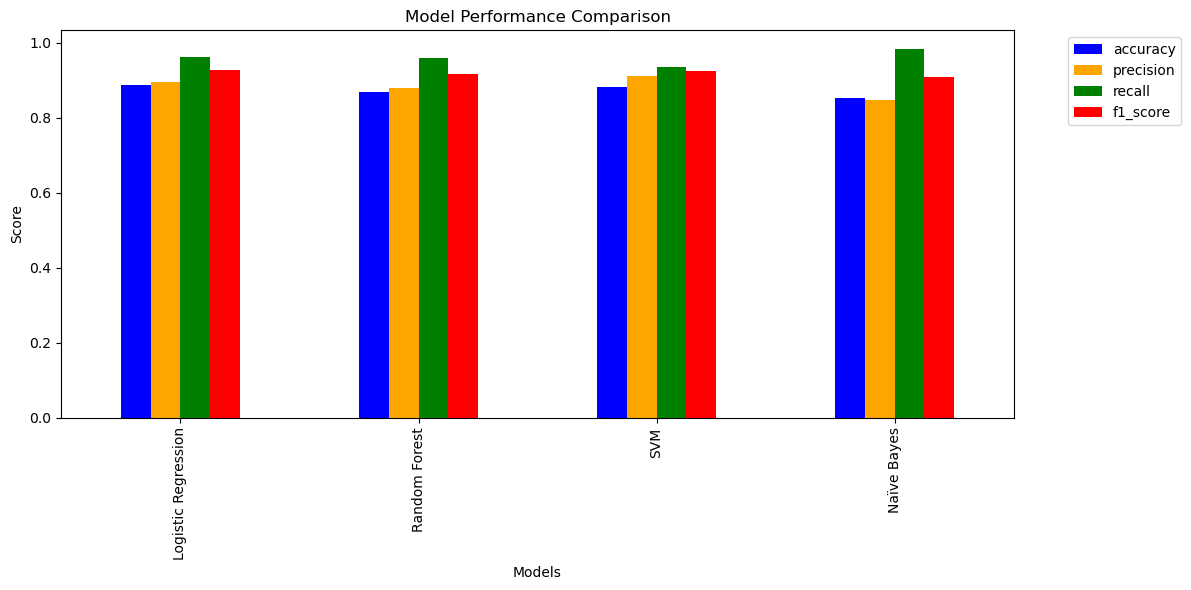

In [21]:
# Plot the Performance
res.plot(kind='bar', figsize=(12, 6),color=['blue', 'orange', 'green', 'red'])
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 8. Conclusion & Comments
- Summarize the findings of the project.
- Provide insights into the challenges faced during data preprocessing, model training, and evaluation.
- Highlight key lessons learned.
- Add clear and concise comments to the code for each step of the project.
- Highlight key results, visualizations, and model comparisons.
